In [1]:
#!/usr/bin/env RScript
###################################################################
# Description: 
# load ../processed_data/20221221_324701_cells_multi.RData
# 1. calculate pca, harmony_RNA for RNA assay
# 2. calculate lsi, harmony_peaks for peaks assay
# 3. calculate wnn, umap for WNN assay
# Author: Dian Li
# Last modified: 2023-May-19

In [2]:
library(Seurat)
library(Signac)
library(SeuratWrappers)
library(SeuratObject)
# library(RENIN)
library(harmony)
library(ggplot2)

Attaching SeuratObject

Attaching sp


Attaching package: ‘Signac’


The following object is masked from ‘package:Seurat’:

    FoldChange


Loading required package: Rcpp



In [3]:
plots_path = file.path("..", "plots", "wnn")
dir.create(plots_path, showWarnings = FALSE, recursive = T)

In [4]:
processed_data_dir = file.path("..", "processed_data", "wnn")

### load novaseq object

In [5]:
# step 1. load novaseq.wnn object
Sys.time()
load(file = file.path(processed_data_dir, "20221221_324701_cells_wnn.RData"))
novaseq.wnn
Sys.time()

[1] "2023-06-17 23:14:42 CDT"

An object of class Seurat 
237522 features across 324701 samples within 2 assays 
Active assay: peaks (189184 features, 189184 variable features)
 1 other assay present: RNA
 5 dimensional reductions calculated: pca, harmony_RNA, lsi, harmony_peaks, WNN.UMAP

[1] "2023-06-17 23:18:57 CDT"

In [6]:
ls()

[1] "level.novaseq"                    "level.novaseq.renal_region_new"  
[3] "level.novaseq.rna"                "novaseq.wnn"                     
[5] "palette.novaseq"                  "palette.novaseq.renal_region_new"
[7] "palette.novaseq.rna"              "plots_path"                      
[9] "processed_data_dir"

In [7]:
library(repr)
options(repr.plot.width = 12, repr.plot.height = 10)

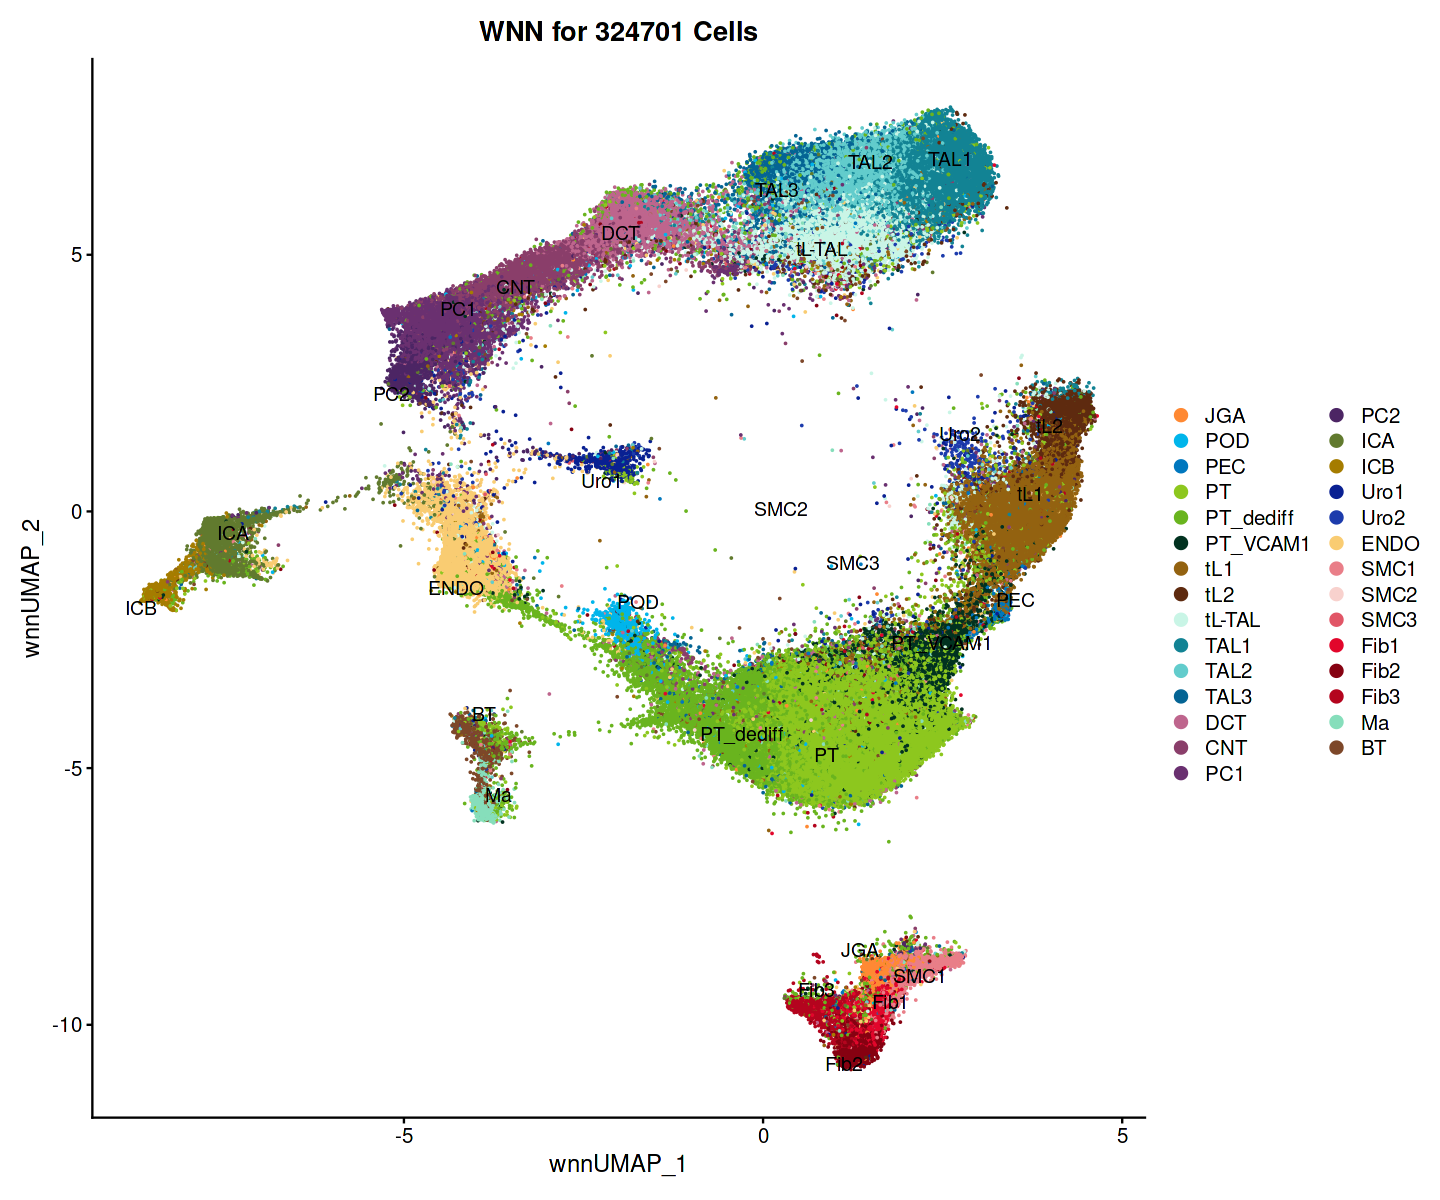

In [8]:
p = DimPlot(novaseq.wnn, reduction = "WNN.UMAP", group.by = "celltype5_rna", cols = palette.novaseq.rna, label = TRUE, label.size = 4, repel = TRUE, raster = FALSE) + ggtitle("WNN for 324701 Cells")
ggsave(p, filename = file.path(plots_path, "324701_cells_WNN.png"), width = 8, height = 6, units = "in", dpi = 300)
ggsave(p, filename = file.path(plots_path, "324701_cells_WNN.pdf"), width = 8, height = 6, units = "in", dpi = 300)
p

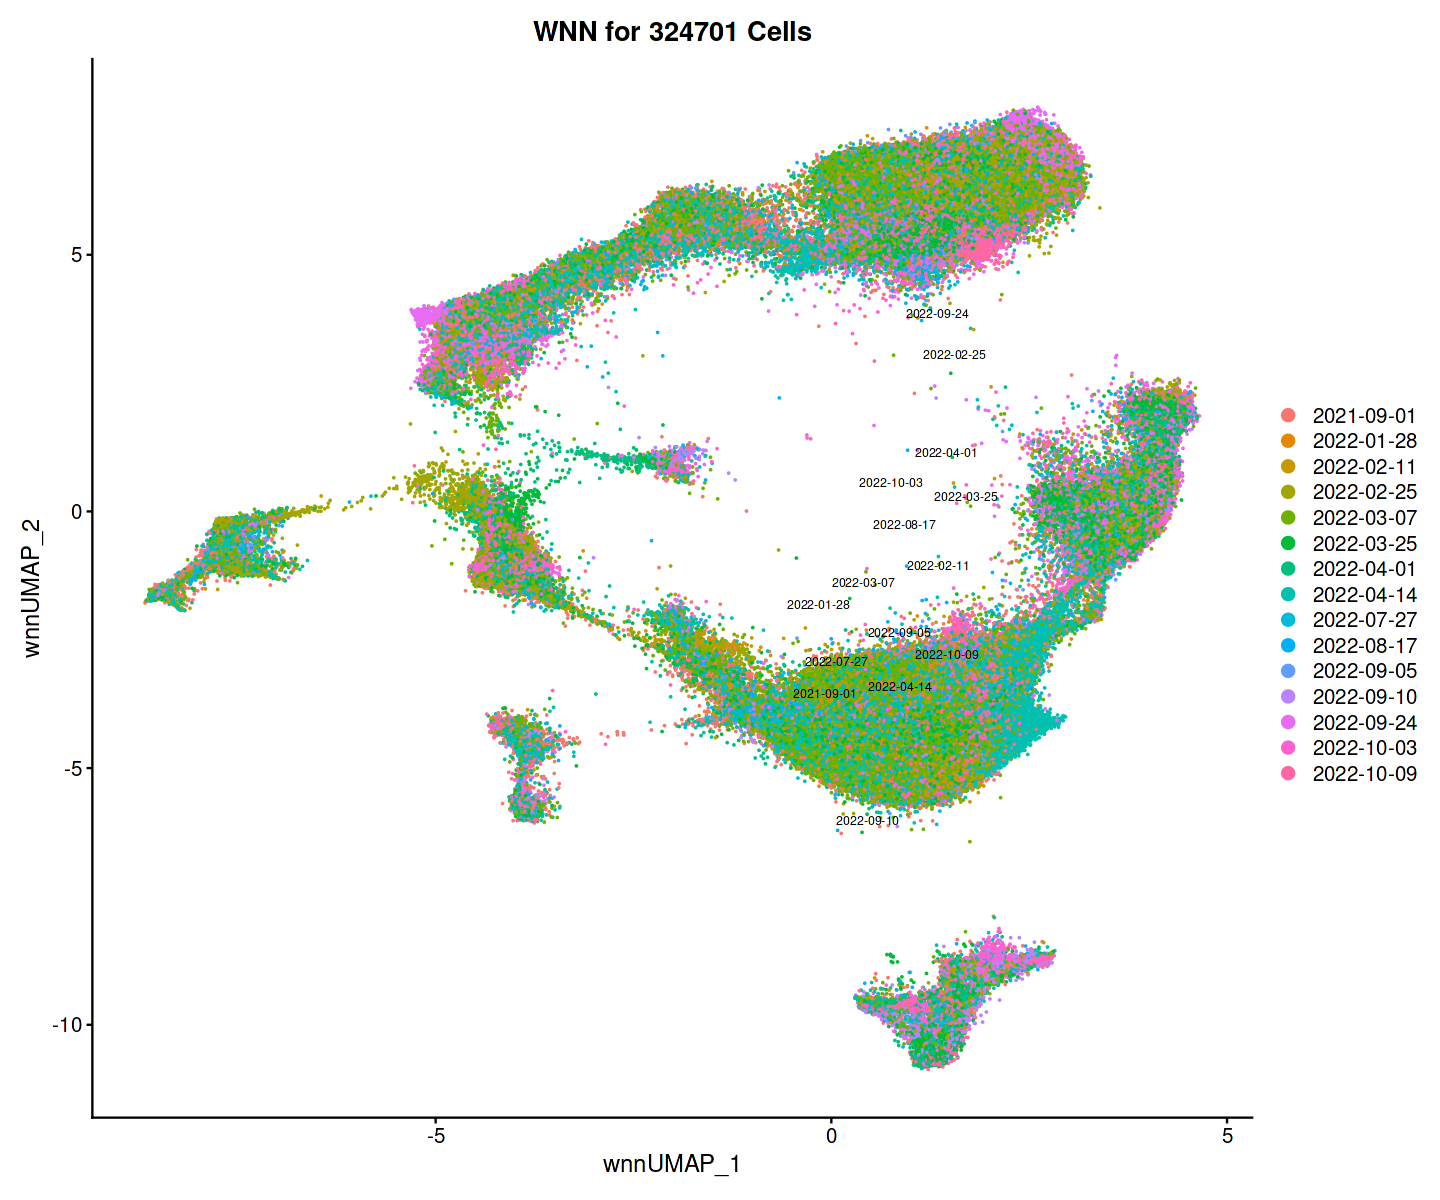

In [9]:
p = DimPlot(novaseq.wnn, reduction = "WNN.UMAP", group.by = "atac_prep_date", label = TRUE, label.size = 2.5, repel = TRUE, raster = FALSE) + ggtitle("WNN for 324701 Cells")
ggsave(p, filename = file.path(plots_path, "324701_cells_WNN_atac_prep_date.png"), width = 8, height = 6, units = "in", dpi = 300)
p

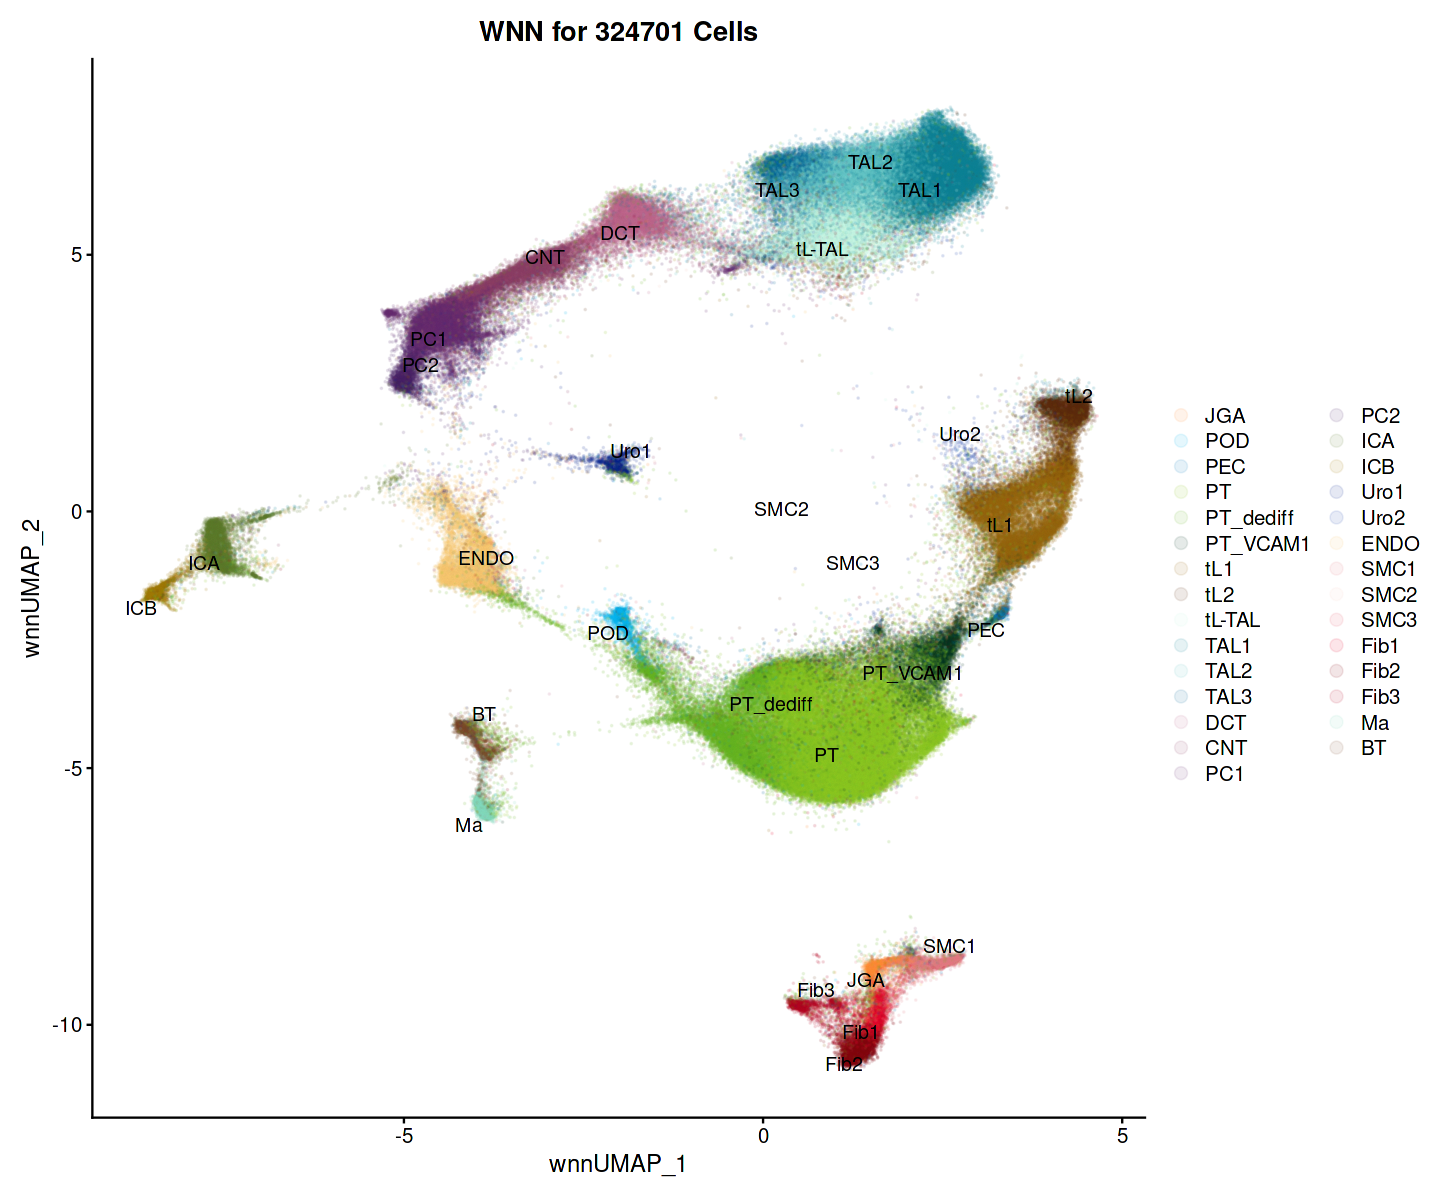

In [10]:
p = DimPlot(novaseq.wnn, reduction = "WNN.UMAP", group.by = "celltype5_rna", cols = alpha(palette.novaseq.rna, 0.1), label = TRUE, label.size = 4, pt.size = 0.01, repel = TRUE, raster = FALSE) + ggtitle("WNN for 324701 Cells")
ggsave(p, filename = file.path(plots_path, "324701_cells_WNN_alpha_0.1.png"), width = 8, height = 6, units = "in", dpi = 300)
p

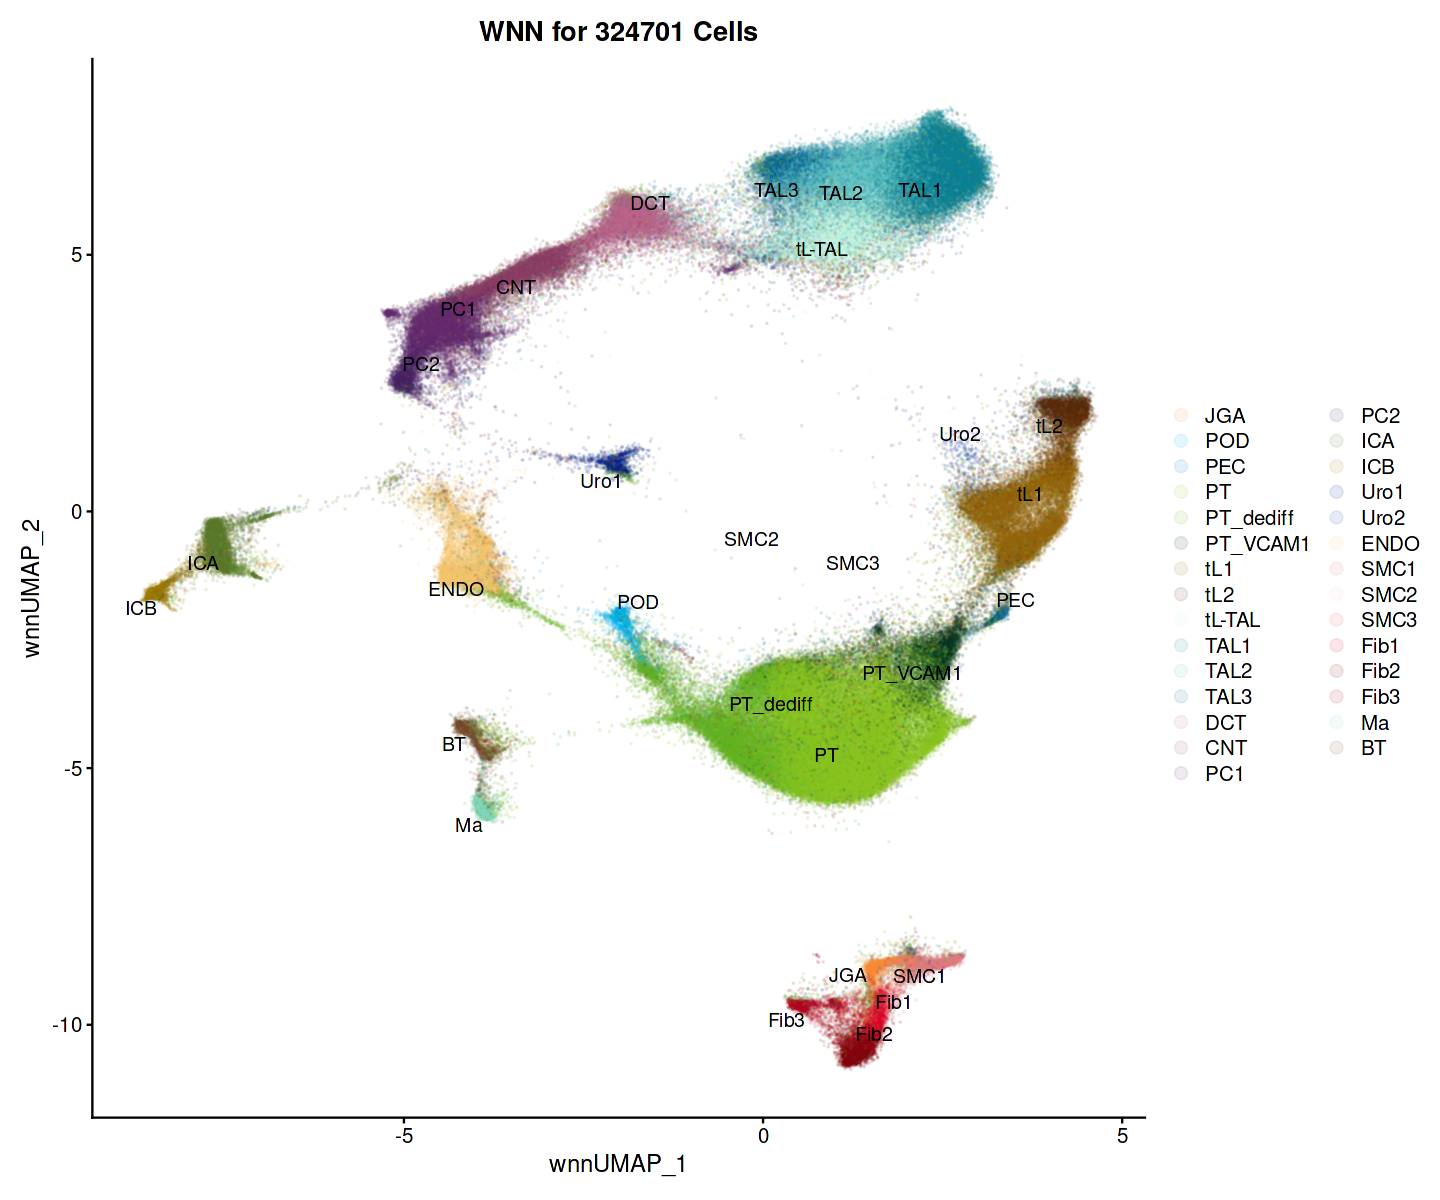

In [11]:
p = DimPlot(novaseq.wnn, reduction = "WNN.UMAP", group.by = "celltype5_rna", cols = alpha(palette.novaseq.rna, 0.1), label = TRUE, label.size = 4, pt.size = 0.01, repel = TRUE, raster = FALSE) + ggtitle("WNN for 324701 Cells")
ggsave(p, filename = file.path(plots_path, "324701_cells_WNN_alpha_0.1.pdf"), width = 8, height = 6, units = "in", dpi = 300)
p

In [12]:
sessionInfo()

R version 4.2.2 (2022-10-31)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 20.04.2 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/blas/libblas.so.3.9.0
LAPACK: /usr/lib/x86_64-linux-gnu/lapack/liblapack.so.3.9.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] repr_1.1.6           ggplot2_3.4.1        harmony_0.1.0       
[4] Rcpp_1.0.10          SeuratWrappers_0.3.0 Signac_1.2.1        
[7] sp_1.5-0             SeuratObject_4.1.0   Seurat_4.1.1        

loaded via a namespace (and not attached):
  [1] uuid_1.1-0       